In [1]:
# Segment Three Machine Learning Model
# Initial version by Josh Stowe, Team Hansen Brothers, Final Capstone Project 202211/10

In [2]:
# mlenv (Python 3.7.13)
# Import dependencies
import numpy as np
import pandas as pd
from pandas import DataFrame
from pathlib import Path
from collections import Counter
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
# from imblearn.metrics import classification_report_imbalanced
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
# from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
import requests
import pickle


In [3]:
# # Load the game stats database for split, train, test
# file_path = Path('Resources/game_teams_stats.csv')
# df = pd.read_csv(file_path)
# df.head()
file_path = Path('Resources/ml_table_copy.csv')
adv_df_og = pd.read_csv(file_path)
adv_df = adv_df_og
# adv_df_og.head()



# Placeholder for preprocessing

In [4]:
# adv_df.isna().sum()

In [5]:
# preprocessing, TBC after db cleaning complete
# merge dfs
# adv_df = advanced_home_df.reset_index().join(advanced_away_df, on='game_id', lsuffix='home_', rsuffix='away_')

# encode home_win true to 1, false to 0
# Use LabelEncoder to convert 'M/F' into integer labels
adv_df = adv_df_og
adv_df['won_home'] = LabelEncoder().fit_transform(adv_df['won_home'])

# drop columns not relevant
adv_df = adv_df.drop(columns="won_away")
adv_df = adv_df.drop(columns="abbreviation_home")
adv_df = adv_df.drop(columns="abbreviation_away")
adv_df = adv_df.drop(columns="team_id_home")
adv_df = adv_df.drop(columns="team_id_away")
adv_df = adv_df.drop(columns="game_id")
adv_df = adv_df.drop(columns="goals_home")
adv_df = adv_df.drop(columns="goals_away")


# encode winoutshootopp_home, winoutshotopp_home, winoutshotbyopp_away, winoutshootbyopp_away true to 1, false to 0
adv_df['winoutshootopp_home'] = LabelEncoder().fit_transform(adv_df['winoutshootopp_home'])
adv_df['winoutshotbyopp_home'] = LabelEncoder().fit_transform(adv_df['winoutshotbyopp_home'])
adv_df['winoutshootopp_away'] = LabelEncoder().fit_transform(adv_df['winoutshootopp_away'])
adv_df['winoutshotbyopp_away'] = LabelEncoder().fit_transform(adv_df['winoutshotbyopp_away'])

adv_df = adv_df.drop(columns="winoutshootopp_home")
adv_df = adv_df.drop(columns="winoutshotbyopp_home")
adv_df = adv_df.drop(columns="winoutshootopp_away")
adv_df = adv_df.drop(columns="winoutshotbyopp_away")


# Split the Data into Training and Testing

In [6]:
# Create the features
# adjust X df with the target features
X = adv_df.drop(columns="won_home")
# X.head()

In [7]:
# create the target
y = adv_df["won_home"]
# y.head()

In [8]:
# X.describe()

In [9]:
# X.dtypes

In [10]:
# Placeholder for column data type conversion

In [11]:
# Create train, test datasets
# Intention is to test sensitivity of test accuracy with the train/test size and select the split ratio that gives the 
# best accuracy prior to another sampling adjustments.
# X_train, X_test, y_train, y_test = train_test_split(X, y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

# Optimized test_size parameter for implemented model
# X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=None, test_size=0.20)


In [12]:
# X_train

In [13]:
# X_test

In [14]:
# y_train

In [15]:
# y_test

# Scaler Implementation

In [17]:
# Placeholder for any scaler implementation NONE USED FOR IMPLEMENTED MODEL
# Scale the dataset using MinMaxScaler()
scaler = MinMaxScaler()
X_scaled = MinMaxScaler().fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

# Scale the dataset using StandardScaler()
# X_scaled = StandardScaler().fit_transform(X)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y,stratify=None, test_size=0.20)

# ML model

In [18]:
# LogisticRegression model, predicting a 1 or 0 outcome
classifier = LogisticRegression()
classifier

classifier.fit(X_train_scaled, y_train)
# classifier.fit(X_train_scaled, y_train)

print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

# print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
# print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

predictions = classifier.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})


Training Data Score: 0.9467547609794015
Testing Data Score: 0.9451476793248945


,Prediction,Actual
2320,1,1
4759,1,1
6929,1,1
11685,0,0
9448,1,1
...,...,...
21133,0,1
14275,1,1
10706,1,1
6980,1,1


# Confusion Matrix

In [19]:
# Setup confusion matrix to show test outcomes vs predicted
y_true = y_test
y_pred = classifier.predict(X_test_scaled)
cm = confusion_matrix(y_true, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual Home Loss", "Actual Home Win"], columns=["Predicted Home Loss", "Predicted Home Win"])

cm_df

,Predicted Home Loss,Predicted Home Win
Actual Home Loss,1900,151
Actual Home Win,96,2356


In [20]:
# Calculate ML model accuracy
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn)

# Calculate the sensitivity of the model based on the confusion matrix
sensitivity = tp / (tp + fn)

# calculate precision
precision = tp / (tp + fp)

# calculate F1 score
f1 = 2*precision*sensitivity / (precision + sensitivity)

print(f"Accuracy: {accuracy}")

Accuracy: 0.9451476793248945


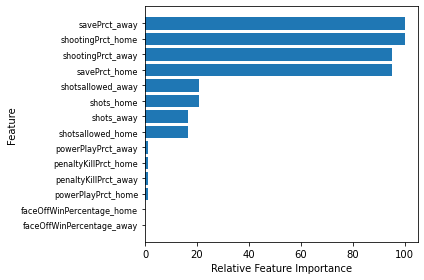

In [21]:
# Feature Relative Importance
from matplotlib import pyplot as plt
feature_importance = abs(classifier.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_index = np.argsort(feature_importance)
pos = np.arange(sorted_index.shape[0]) + .5

rel_fig = plt.figure()
rel_fig_ax = rel_fig.add_subplot(1, 1, 1)
rel_fig_ax.barh(pos, feature_importance[sorted_index], align='center')
rel_fig_ax.set_yticks(pos)
rel_fig_ax.set_yticklabels(np.array(X.columns)[sorted_index], fontsize=8)
rel_fig_ax.set_xlabel('Relative Feature Importance')
rel_fig_ax.set_ylabel('Feature')

plt.tight_layout()   
plt.show()

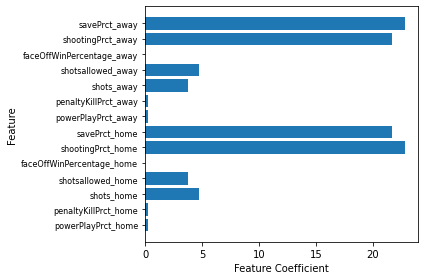

In [22]:
# Feature  Importance
feature_importance = abs(classifier.coef_[0])

# sorted_index = np.arg(feature_importance)
# pos = np.arange(sorted_index.shape[0]) + .5

fig = plt.figure()
fig_ax = fig.add_subplot(1, 1, 1)
fig_ax.barh(pos, feature_importance, align='center')
fig_ax.set_yticks(pos)
fig_ax.set_yticklabels(np.array(X.columns), fontsize=8)
fig_ax.set_xlabel('Feature Coefficient')
fig_ax.set_ylabel('Feature')

plt.tight_layout()   
plt.show()

# Predictions

In [24]:
# Model prediction with API
away_id = 26
home_id = 22

# team API
url = "https://statsapi.web.nhl.com/api/v1/teams/"+str(away_id)+"/?expand=team.stats"
away = requests.get(url).json()

# home team API
url = "https://statsapi.web.nhl.com/api/v1/teams/"+str(home_id)+"/?expand=team.stats"
home = requests.get(url).json()

# compile data from jsons
gamedata = []
id = home['teams'][0]['teamStats'][0]['splits'][0]['team']['id']
home_name = home['teams'][0]['teamStats'][0]['splits'][0]['team']['name']
gpg = home['teams'][0]['teamStats'][0]['splits'][0]['stat']['goalsPerGame']
gapg = home['teams'][0]['teamStats'][0]['splits'][0]['stat']['goalsAgainstPerGame']
pppctg = home['teams'][0]['teamStats'][0]['splits'][0]['stat']['powerPlayPercentage']
pkpctg = home['teams'][0]['teamStats'][0]['splits'][0]['stat']['penaltyKillPercentage']
shots = home['teams'][0]['teamStats'][0]['splits'][0]['stat']['shotsPerGame']
shotsallowed = home['teams'][0]['teamStats'][0]['splits'][0]['stat']['shotsAllowed']
winoutshootopp = home['teams'][0]['teamStats'][0]['splits'][0]['stat']['winOutshootOpp']
winoutshotbyopp = home['teams'][0]['teamStats'][0]['splits'][0]['stat']['winOutshotByOpp']
faceoffpctg = home['teams'][0]['teamStats'][0]['splits'][0]['stat']['faceOffWinPercentage']
shootingpctg = home['teams'][0]['teamStats'][0]['splits'][0]['stat']['shootingPctg']
savepctg = home['teams'][0]['teamStats'][0]['splits'][0]['stat']['savePctg']
gamedata.append({
    # "id" : id,
                  # "name" : name,
                #  "gpg" : gpg,
                #  "gapg" : gapg,
                 "powerPlayPrct_home" : float(pppctg)/100,
                 "penaltyKillPrct_home" : float(pkpctg)/100,
                 "shots_home" : shots,
                 "shotsallowed_home" : shotsallowed,
                #  "winoutshootopp" : winoutshootopp,
                #  "winoutshotbyopp" : winoutshotbyopp,
                 "faceOffWinPercentage_home" : faceoffpctg,
                 "shootingPrct_home" : float(shootingpctg)/100,
                 "savePrct_home" : savepctg})
home_df = pd.DataFrame(gamedata)
# away data
gamedata = []
id = away['teams'][0]['teamStats'][0]['splits'][0]['team']['id']
away_name = away['teams'][0]['teamStats'][0]['splits'][0]['team']['name']
gpg = away['teams'][0]['teamStats'][0]['splits'][0]['stat']['goalsPerGame']
gapg = away['teams'][0]['teamStats'][0]['splits'][0]['stat']['goalsAgainstPerGame']
pppctg = away['teams'][0]['teamStats'][0]['splits'][0]['stat']['powerPlayPercentage']
pkpctg = away['teams'][0]['teamStats'][0]['splits'][0]['stat']['penaltyKillPercentage']
shots = away['teams'][0]['teamStats'][0]['splits'][0]['stat']['shotsPerGame']
shotsallowed = away['teams'][0]['teamStats'][0]['splits'][0]['stat']['shotsAllowed']
winoutshootopp = away['teams'][0]['teamStats'][0]['splits'][0]['stat']['winOutshootOpp']
winoutshotbyopp = away['teams'][0]['teamStats'][0]['splits'][0]['stat']['winOutshotByOpp']
faceoffpctg = away['teams'][0]['teamStats'][0]['splits'][0]['stat']['faceOffWinPercentage']
shootingpctg = away['teams'][0]['teamStats'][0]['splits'][0]['stat']['shootingPctg']
savepctg = away['teams'][0]['teamStats'][0]['splits'][0]['stat']['savePctg']
gamedata.append({
    # "awayid" : id,
                #  "awayname" : name,
                #  "gpg" : gpg,
                #  "gapg" : gapg,
                 "powerPlayPrct_away" : float(pppctg)/100,
                 "penaltyKillPrct_away" : float(pkpctg)/100,
                 "shots_away" : shots,
                 "shotsallowed_away" : shotsallowed,
                #  "winoutshootopp" : winoutshootopp,
                #  "winoutshotbyopp" : winoutshotbyopp,
                 "faceOffWinPercentage_away" : faceoffpctg,
                 "shootingPrct_away" : float(shootingpctg)/100,
                 "savePrct_away" : savepctg})
away_df = pd.DataFrame(gamedata)
# combine home and away current stats dataframes
compiled_stats_df = pd.concat([home_df,away_df],axis=1)

# scaler for use in ML model
scaler = MinMaxScaler().fit(X)

# X_scaled = MinMaxScaler().fit_transform(X)

compiled_scaled_df = pd.DataFrame(scaler.transform(compiled_stats_df),columns = compiled_stats_df.columns)

# compiled_scaled_df = minmax_scale(compiled_stats_df)

# test_df = test_df.drop(columns="name")
# test_df = test_df.drop(columns="awayname")
prediction = classifier.predict(compiled_scaled_df)
predicted_winner = home_name
if int(prediction[0]) == 0:
    predicted_winner = away_name
  
# pd.DataFrame({"Prediction": predicted_winner})
print(predicted_winner, prediction[0])


Edmonton Oilers 1


In [25]:
pd.DataFrame({"Prediction": prediction})

,Prediction
0,1


In [26]:
home_name

'Edmonton Oilers'

In [27]:
away_name

'Los Angeles Kings'

In [28]:
# scikit learn pickle export ML model for use
# .sav file
# save
with open('HockeyMLmodel.pkl','wb') as f:
    pickle.dump(classifier,f)

# # load
# with open('model.pkl', 'rb') as f:
#     clf2 = pickle.load(f)

# clf2.predict(X[0:1])